In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

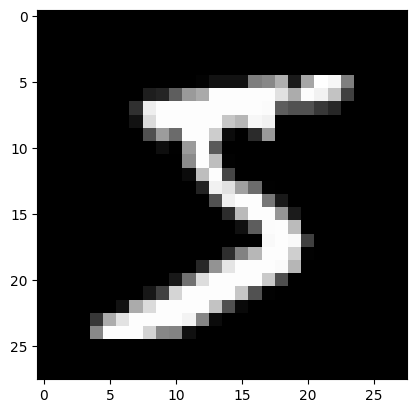

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

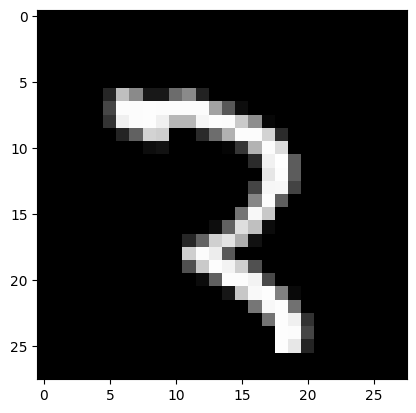

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:

y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(128,activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=128,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
469/469 [==============================] - 45s 94ms/step - loss: 0.2194 - accuracy: 0.9365 - val_loss: 0.0753 - val_accuracy: 0.9773
Epoch 2/10
469/469 [==============================] - 33s 69ms/step - loss: 0.0653 - accuracy: 0.9814 - val_loss: 0.0563 - val_accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0341 - accuracy: 0.9901 - val_loss: 0.0463 - val_accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0444 - val_accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0404 - val_accuracy:

In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.219432,0.936450,0.075286,0.9773
1,0.065290,0.981383,0.056348,0.9821
2,0.044641,0.986500,0.043914,0.9852
3,0.034148,0.990050,0.046342,0.9849
4,0.025633,0.992267,0.044412,0.9848


Developed by : Sri Varshan P
Reg.no.: 212222240104


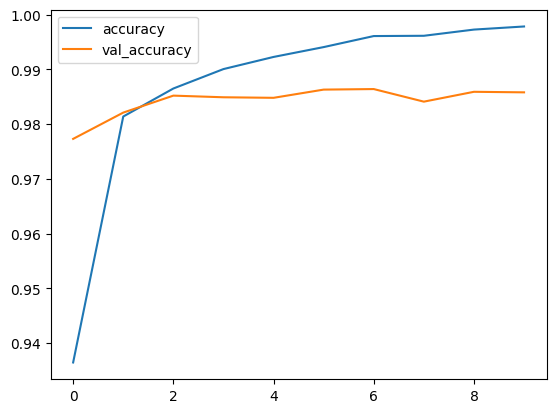

In [28]:
metrics[['accuracy','val_accuracy']].plot()
print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')

Developed by : Sri Varshan P
Reg.no.: 212222240104


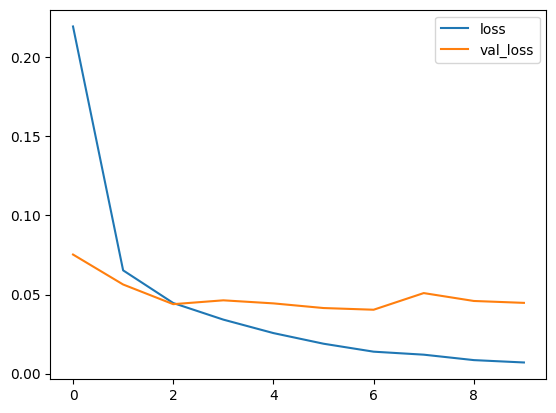

In [29]:
metrics[['loss','val_loss']].plot()
print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 4s 14ms/step


In [32]:
print(confusion_matrix(y_test,x_test_predictions))
print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')

[[ 975    0    1    1    0    1    2    0    0    0]
 [   0 1125    3    1    1    0    2    1    2    0]
 [   3    1 1020    0    1    0    0    5    2    0]
 [   0    0    2  995    0    8    0    1    3    1]
 [   0    0    3    0  970    0    1    0    0    8]
 [   2    0    0    7    0  879    4    0    0    0]
 [   5    2    0    1    1    4  943    0    2    0]
 [   0    2    7    0    0    0    0 1017    1    1]
 [   6    0    6    1    0    3    1    3  948    6]
 [   0    0    1    3    8    5    0    5    1  986]]
Developed by : Sri Varshan P
Reg.no.: 212222240104


In [33]:
print(classification_report(y_test,x_test_predictions))
print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Developed by : Sri Varshan P
Reg.no.: 212222240104


In [34]:
img = image.load_img('/content/SampleMNIST.png')


In [35]:
type(img)

PIL.Image.Image

In [37]:
img = image.load_img('/content/SampleMNIST.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [39]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [40]:
print(x_single_prediction)
print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')

[8]
Developed by : Sri Varshan P
Reg.no.: 212222240104


Developed by : Sri Varshan P
Reg.no.: 212222240104


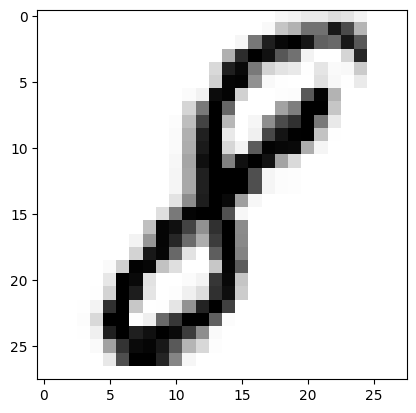

In [42]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

print('Developed by : Sri Varshan P')
print('Reg.no.: 212222240104')